In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


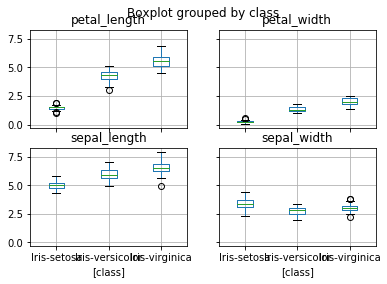

In [19]:
df.boxplot(by='class');

In [20]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)

In [38]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [39]:
scores.mean()

0.9733333333333334

In [40]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    'n_neighbors': [1,2,3,4,5,6],
    'leaf_size': [1,10,15,20,25,30]
}

In [61]:
knn = KNeighborsClassifier()

In [62]:
g = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

In [63]:
g.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'leaf_size': [1, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
g.cv_results_

{'mean_fit_time': array([0.0063427 , 0.00266042, 0.00265527, 0.00296535, 0.00339756,
        0.00241709, 0.00276122, 0.00290322, 0.00238662, 0.00318341,
        0.00238113, 0.00209179, 0.00202069, 0.00194941, 0.00209074,
        0.00277219, 0.0025991 , 0.0042942 , 0.0032691 , 0.00197062,
        0.00216789, 0.00202045, 0.00194192, 0.00210786, 0.00207844,
        0.00241928, 0.00250697, 0.00241456, 0.00244303, 0.00310888,
        0.00305395, 0.00197902, 0.00209222, 0.00209484, 0.00202603,
        0.00202508]),
 'std_fit_time': array([2.00876606e-03, 6.45036196e-04, 6.36777186e-04, 7.19007975e-04,
        1.04979034e-03, 2.72449121e-04, 6.46174347e-05, 5.33881393e-04,
        2.78517086e-04, 3.75009110e-04, 5.17660805e-04, 1.67746514e-04,
        7.08928093e-05, 5.91619455e-05, 1.94111230e-04, 1.22264195e-03,
        3.59194807e-04, 6.39492238e-04, 7.90830906e-04, 2.84634640e-05,
        3.98778302e-04, 7.21044323e-05, 4.16481159e-05, 1.10951205e-04,
        1.22252771e-04, 6.77352200e-0

In [65]:
g.best_score_

0.98

In [66]:
g.best_params_

{'leaf_size': 1, 'n_neighbors': 6}

In [67]:
g.predict(X)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [69]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
from sklearn.preprocessing import scale

In [71]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_new = scale(X)

In [72]:
g = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

In [73]:
g.fit(X_new, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'leaf_size': [1, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [74]:
g.best_score_

0.9666666666666667